<a href="https://colab.research.google.com/github/Akarsh-20/Akarsh_INFO5731_UNT/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def getNgrams(tokens, n):
    return list(ngrams(tokens, n))

def NgramsCount(tokens, n):
    n_grams = getNgrams(tokens, n)
    return Counter(n_grams)

def BigramProbsCalculation(tokens):
    bigrams = getNgrams(tokens, 2)
    unigrams = tokens
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(unigrams)

    probabilities = {}

    for bigram in bigram_counts:
        w1, w2 = bigram
        probability = bigram_counts[bigram] / unigram_counts[w1]
        probabilities[bigram] = probability

    return probabilities

def NounPhrases(text):
    # You can use a more sophisticated approach for noun phrase extraction
    # For simplicity, we'll use a basic method here.
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)

    # Extracting noun phrases using a simple rule
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tagged_tokens)

    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))

    return noun_phrases

def RelativeProb(dataset):
    all_noun_phrases = []
    review_noun_phrases = []

    for review in dataset:
        noun_phrases = NounPhrases(review)
        review_noun_phrases.append(Counter(noun_phrases))
        all_noun_phrases.extend(noun_phrases)

    max_freq = Counter(all_noun_phrases)

    relative_probabilities = []
    for review_noun_phrase_count in review_noun_phrases:
        relative_probabilities.append({
            np: review_noun_phrase_count[np] / max_freq[np] if max_freq[np] != 0 else 0
            for np in review_noun_phrase_count
        })

    return relative_probabilities

# Upload the dataset.txt file to your Colab environment

# Read the dataset from a file
with open('hotelReviews.csv', 'r', encoding='utf-8') as file:
    dataset = file.readlines()

# Tokenize the dataset
tokenized_dataset = [word_tokenize(review) for review in dataset]

# Count the frequency of all the N-grams (N=3)
trigram_counts = NgramsCount([tuple(review) for review in tokenized_dataset], 3)
print("Trigram Frequencies:")
print(trigram_counts)

# Calculate the probabilities for all the bigrams
bigram_probabilities = BigramProbsCalculation([word for review in tokenized_dataset for word in review])
print("\nBigram Probabilities:")
print(bigram_probabilities)

# Extract all the noun phrases and calculate relative probabilities
relative_probabilities = RelativeProb(dataset)
df = pd.DataFrame(relative_probabilities)
df = df.fillna(0)  # Fill NaN values with 0 for better presentation
print("\nRelative Probabilities of Noun Phrases:")
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Trigram Frequencies:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Bigram Probabilities:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
"The rooms were clean, very comfortable, and the staff was amazing. They went over and beyond to help make our stay enjoyable. I highly recommend this hotel for anyone visiting downtown"    "Unbelievable events and lack of believability make it hard to invest in the idea that John Wick is truly dead at the end.",
    "They were extremely accommodating and allowed us to check in early at like 10am. We got to hotel super early and I didn’t wanna wait. So this was a big plus. The sevice was exceptional as well. Would definitely send a friend there.",
    "I had a wonderful experience at the (HN). Every staff member I encountered, from the valet to the check- in to the cleaning staff were delightful and eager to help! Thank you! Will recommend to my colleagues!",
    "The staff at this property are all great! They all go above and beyond to make your stay comfortable. Please (HN) give your staff awards!"
]

# Sample query
query = "This is the perfect hotel for a weekend getaway in (L). The downtown area on Main Street is a best kept secret and the (HN) offers everything you need if you don’t feel like venturing out."

# Combine documents and query for TF-IDF matrix calculation
all_texts = documents + [query]

#Build TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

#Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

#Rank documents based on cosine similarity
document_scores = list(enumerate(cosine_similarities[0]))
sorted_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)

#Print the TF-IDF matrix
print("Terms\t", "\t".join(["Document " + str(i + 1) for i in range(len(documents))] + ["Query"]))
terms = vectorizer.get_feature_names_out()
for i in range(len(terms)):
    print(terms[i], end="\t")
    for j in range(len(all_texts)):
        print(f"{tfidf_matrix[j, i]:.4f}", end="\t")
    print()

#Print the ranked documents
print("\nQuery:", query)
print("\nRanked Documents:")
for index, score in sorted_documents:
    print(f"Document {index + 1}: Similarity Score = {score:.4f}")
    print(f"   {documents[index]}")
    print()

Terms	 Document 1	Document 2	Document 3	Document 4	Query
10am	0.0000	0.1676	0.0000	0.0000	0.0000	
above	0.0000	0.0000	0.0000	0.2099	0.0000	
accommodating	0.0000	0.1676	0.0000	0.0000	0.0000	
all	0.0000	0.0000	0.0000	0.4198	0.0000	
allowed	0.0000	0.1676	0.0000	0.0000	0.0000	
amazing	0.1516	0.0000	0.0000	0.0000	0.0000	
and	0.2167	0.1597	0.0872	0.1000	0.0880	
anyone	0.1516	0.0000	0.0000	0.0000	0.0000	
are	0.0000	0.0000	0.0000	0.2099	0.0000	
area	0.0000	0.0000	0.0000	0.0000	0.1847	
as	0.0000	0.1676	0.0000	0.0000	0.0000	
at	0.0854	0.0944	0.1031	0.1182	0.0000	
awards	0.0000	0.0000	0.0000	0.2099	0.0000	
believability	0.1516	0.0000	0.0000	0.0000	0.0000	
best	0.0000	0.0000	0.0000	0.0000	0.1847	
beyond	0.1223	0.0000	0.0000	0.1693	0.0000	
big	0.0000	0.1676	0.0000	0.0000	0.0000	
check	0.0000	0.1352	0.1476	0.0000	0.0000	
clean	0.1516	0.0000	0.0000	0.0000	0.0000	
cleaning	0.0000	0.0000	0.1830	0.0000	0.0000	
colleagues	0.0000	0.0000	0.1830	0.0000	0.0000	
comfortable	0.1223	0.0000	0.0000	0.1693	0.0000	

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

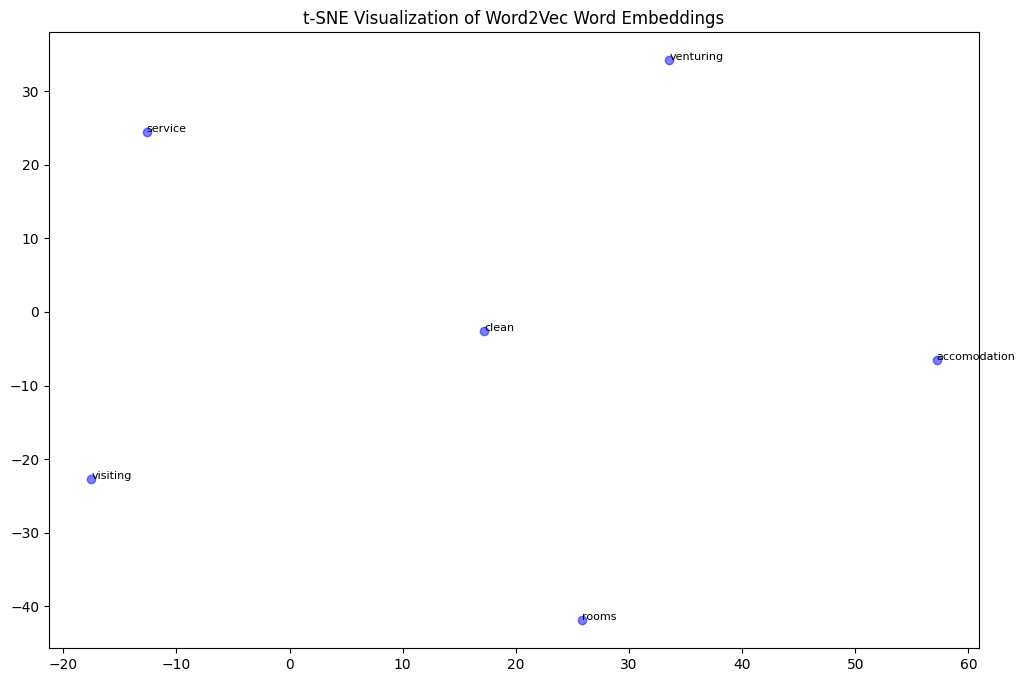

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your IMDb reviews dataset
csv_path = "hotelReviews.csv"
df = pd.read_csv(csv_path)

# Assuming the column name is 'Cleaned Review' (replace with the actual column name)
corpus = [str(review).split() for review in df['reviews.text']]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec_model.bin")

# Visualize word embeddings using t-SNE with a safe perplexity value
def visualize_embeddings(model, words):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])

    # Ensure perplexity is less than the number of samples
    perplexity = min(5, len(vectors)-1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectors_tsne = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='o', color='b', alpha=0.5)

    for i, word in enumerate(words):
        if i < len(vectors_tsne):  # Ensure we don't go out of bounds
            plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

    plt.title("t-SNE Visualization of Word2Vec Word Embeddings")
    plt.show()

# Choose words to visualize
words_to_visualize = ["rooms", "accomodation", "clean", "venturing", "visiting", "service"]

# Visualize embeddings
visualize_embeddings(model, words_to_visualize)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [7]:
# The GitHub link of your final csv file
# Link:

https://github.com/Akarsh-20/Akarsh_INFO5731_UNT/blob/main/hotel_reviews_sentiment.csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       reviews.id                                       reviews.text sentiment
0             NaN  Pleasant 10 min walk along the sea front to th...  positive
1             NaN  Really lovely hotel. Stayed on the very top fl...  positive
2             NaN  Ett mycket bra hotell. Det som drog ner betyge...   neutral
3             NaN  We stayed here for four nights in October. The...  positive
4             NaN  We stayed here for four nights in October. The...  positive
...           ...                                                ...       ...
35907         NaN  Best of the Best!!!! My family and I stayed in...  positive
35908         NaN  Amazing Vacation in Beautiful Cabin We stayed ...  positive
35909         NaN  My husband and I stayed at Tree Tops which is ...  positive
35910         NaN  to share your opinion of this businesswith YP ...  positive
35911         NaN         xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx   neutral

[35912 rows x 3 columns]
